# Importations

In [4]:
import sys
sys.path.append('../python/')
from importations import * 
from utils import * 
from cbr import * 
from cbr_t import * 
from encoder import * 
from decoder import * 
from fusenet import *


# Load the dataset

In [5]:
''' Method previously used to load the data but inefficient because it required too much RAM '''
nyu = load_obj('nyu')

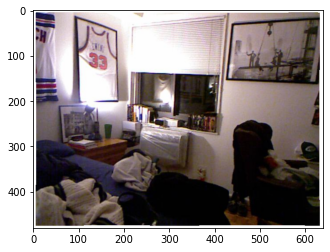

In [6]:
# Plot the RGB image
plt.imshow(nyu['Images'][:,:,:,177])

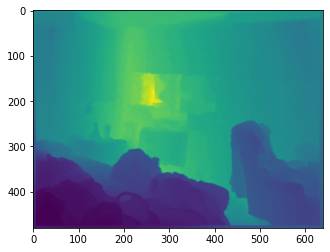

In [7]:
# Plot the depth image
plt.imshow(nyu['Depths'][:,:,177])

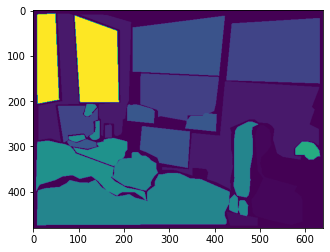

In [8]:
# Plot the labels  
plt.imshow(nyu['Labels'][:,:,177])

# Examination of the data

## Scenes distribution 

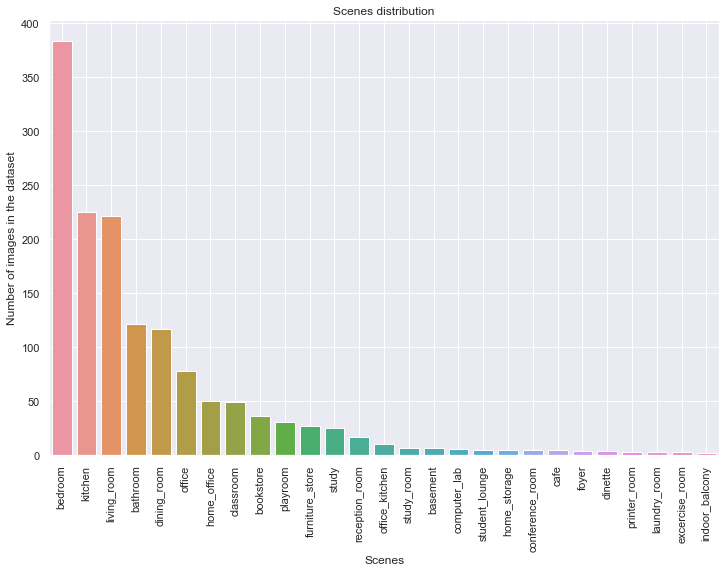

In [9]:
distribution_scenes = plot_histogram(nyu['Scenes'], params = {'xlabel':'Scenes' , \
                                        'ylabel' :'Number of images in the dataset' ,
                                        'title' :'Scenes distribution' })

## Number of classes for the different scenes

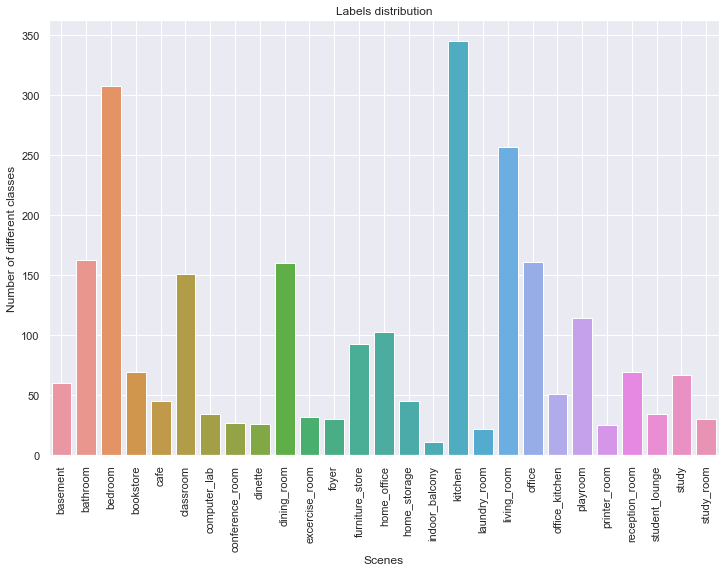

In [10]:
num_classes = plot_num_class(nyu['Labels'], nyu['Scenes'])

## Number of classes and images for the different scenes 

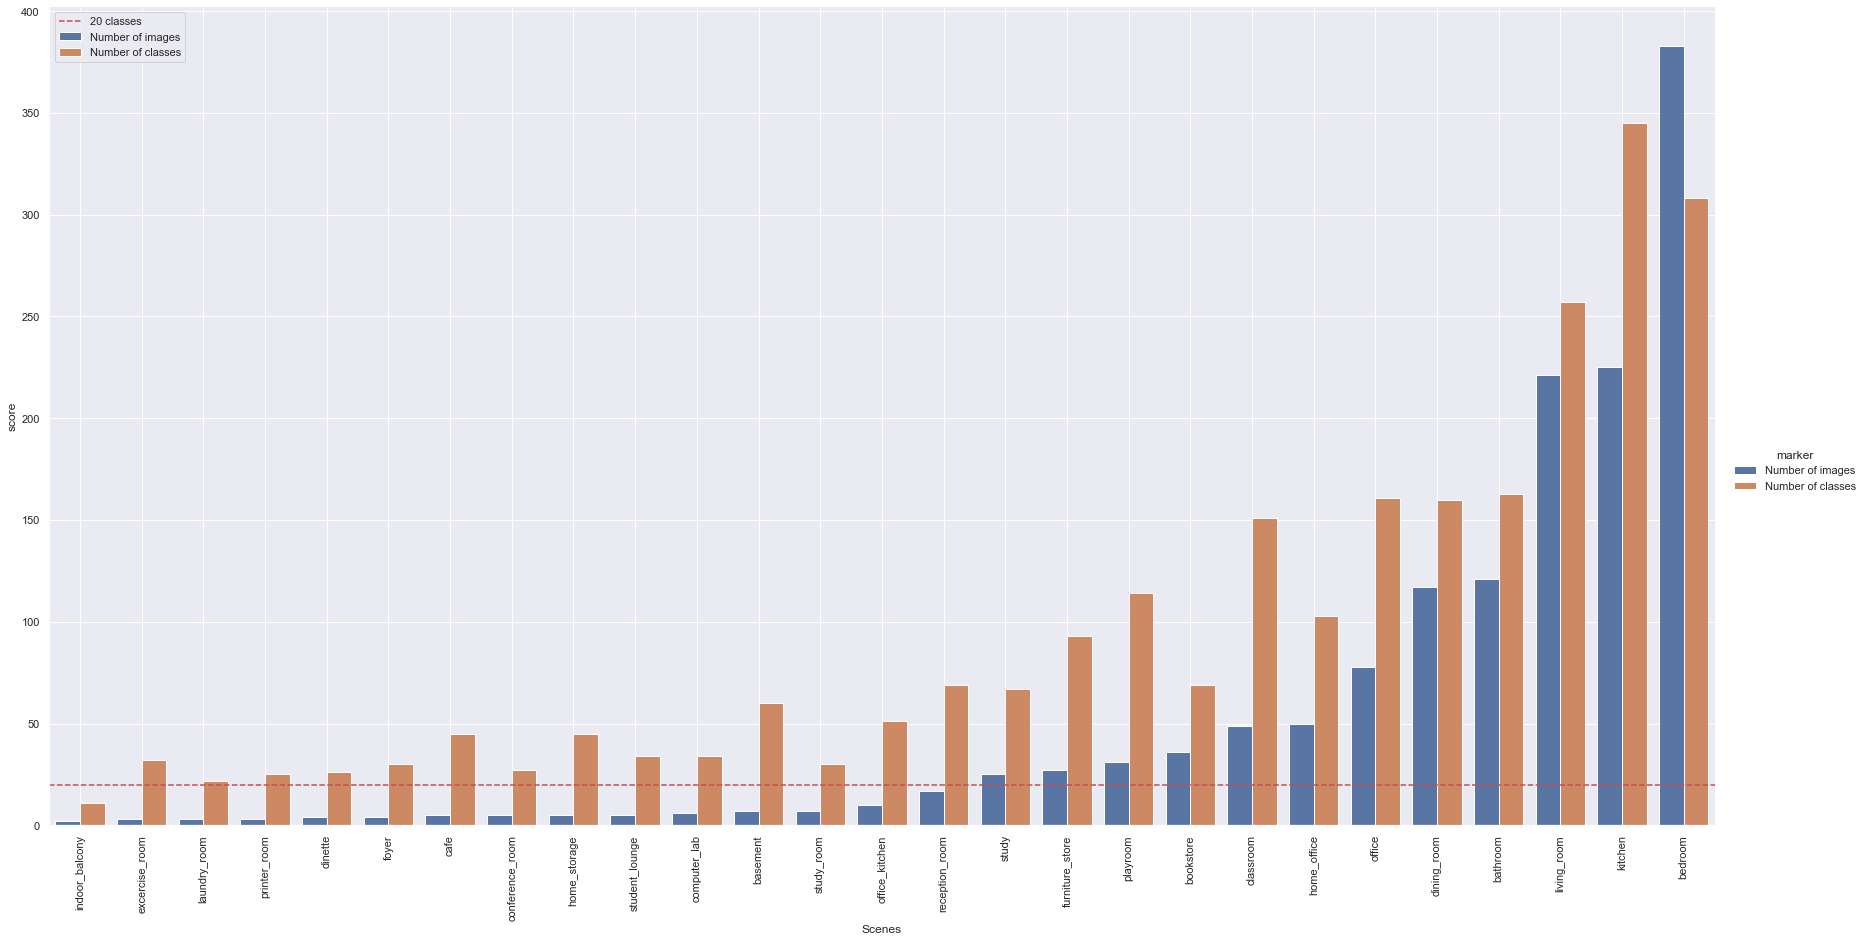

In [11]:
plot_classes_distribution(distribution_scenes, num_classes)

## Number of images for the 894 classes 

In [12]:
classes_over_images = get_distribution_classes(nyu['Labels'])

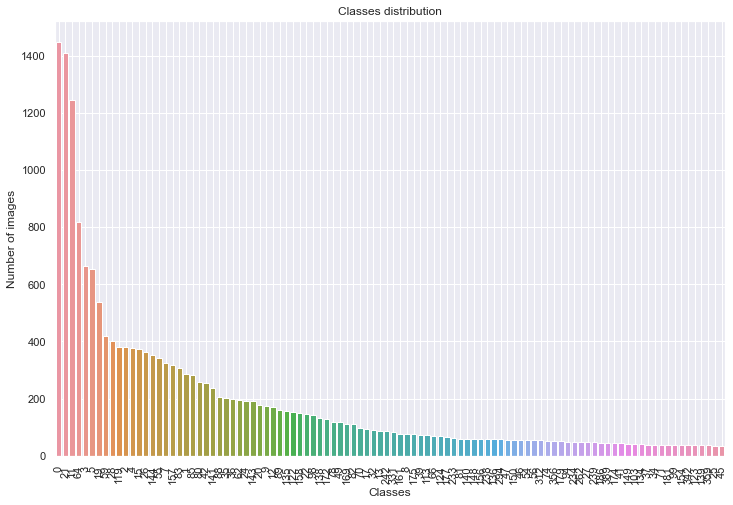

In [13]:
plot_sns(x = [str(x) for x in list(classes_over_images.keys())][:100],\
         y = list(classes_over_images.values())[:100], xlabel = 'Classes',\
         ylabel='Number of images', title = 'Classes distribution')

## Keep the only 20 highest classes

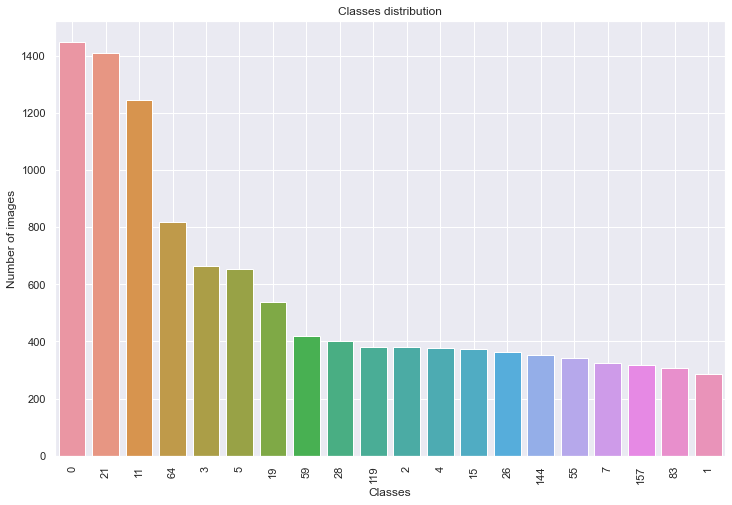

In [14]:
plot_sns(x = [str(x) for x in list(classes_over_images.keys())][:20],\
         y = list(classes_over_images.values())[:20], xlabel = 'Classes',\
         ylabel='Number of images', title = 'Classes distribution')

## Get the new dataset 

In [15]:
classes = list(classes_over_images.keys())[:20]

In [16]:
nyu_ = get_nyu_classes(nyu, classes, step= 2 )

In [17]:
nyu_['labels'] = convert_labels(nyu_['labels'], classes)

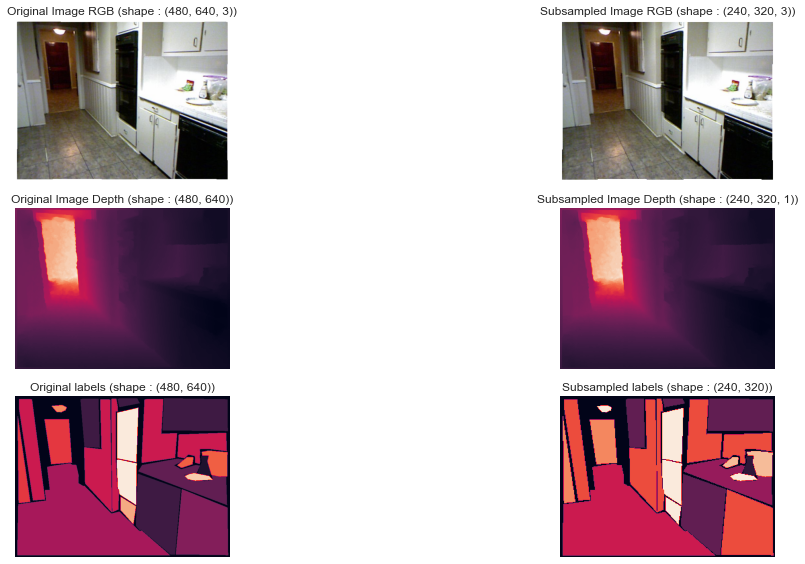

In [18]:
compare_images(nyu,nyu_)

In [19]:
nyu_['labels'].shape

(1449, 240, 320)

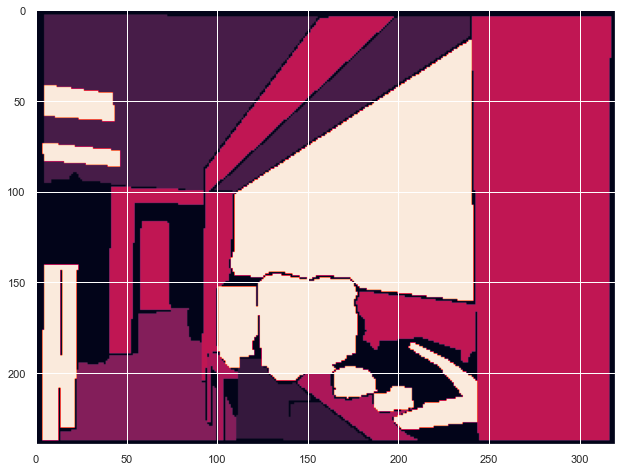

In [20]:
plt.imshow(nyu_['labels'][15])

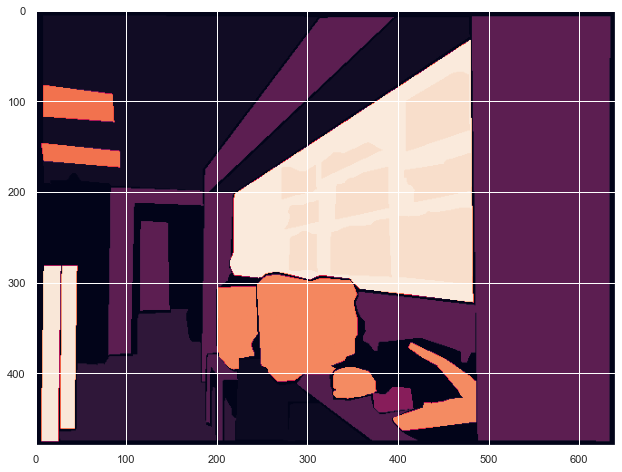

In [21]:
plt.imshow(nyu['Labels'][:,:,15])

# Save the new dataset 

In [74]:
save_obj(nyu_,'nyu_sampled')

# Split into data for the models 

In [75]:
N = len(np.unique(nyu_['labels']))

In [76]:
print('Number of different classes : {}'.format(N))

Number of different classes : 21


## Split into training, validation and testing sets

In [77]:
nyu_['images'].shape

(1449, 240, 320, 3)

In [82]:
def split_train_valid_test(nyu) :
    ''' Take the nyu object and return a split into train, validation and test '''
    images = nyu['images'].reshape(-1, 3, 240, 320)
    depths = nyu['depths'].reshape(-1,1, 240, 320)
    labels = nyu['labels'].reshape(-1,240, 320)
    N = np.max(labels)

    labels_hot = one_hot_encode(labels, N+1)

    idx = np.arange(images.shape[0])
    np.random.shuffle(idx)

    train_ids = idx[:700]
    val_ids = idx[700:795]
    test_ids = idx[795:]

    images_train = images[train_ids]
    images_val = images[val_ids]
    images_test = images[test_ids]

    depth_train = depths[train_ids]
    depth_val = depths[val_ids]
    depth_test = depths[test_ids]

    label_train = labels[train_ids]
    label_val = labels[val_ids]
    label_test = labels[test_ids]

    train, val, test = {},{},{}

    train['images'] = images_train
    train['depths'] = depth_train
    train['labels'] = label_train

    val['images'] = images_val
    val['depths'] = depth_val
    val['labels'] = label_val

    test['images'] = images_test
    test['depths'] = depth_test
    test['labels'] = label_test

    return train, val, test

In [83]:
train, val, test = split_train_valid_test(nyu_)

## Save the datasets

In [84]:
# Training set 
save_obj(train,'train')
# Validation set
save_obj(val,'validation')
# Testing set 
save_obj(test,'test')